<a href="https://colab.research.google.com/github/kavincomp/FinalProjectSentimentAnalysis/blob/main/FinalProjectPricePrediction.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>


<h1><center>Price Prediction Analysis on the AirBnb Dataset </center><h1>

<h3> <b>R.B.1 Introduction</b> </h3>

<p> This project, will explore on the price prediction analysis performed on the New York AirBnb Dataset. The dataset, sourced from Kaggle, has a set of 48895 records, with 16 features, namely <i> id, host_id, name, host_name, latitude, longitude, room_type, price, minimum_nights, number_of_reviews, last_review, reviews_per_month, calculated_host_listings_count, availability_365.</i> A handful of features which are considered to influence the pricing of an accomodation will be selected. Those are <b><i>neighbourhood_group, room_type and minimum_nights</i>. The target variable would be '<i>price</i>'</b>. Various libraries such as <i> Numpy, Pandas,   Matplotlib, Scikit Learn, Keras, Tensorflow</i>  and their associated classes shall be used for this project work. </p>

<p> The aim of this project is to create a robust deep learning model supported by the <i><b>MLP(Multi Layer Perceptron)</b></i> neural network model architecture, that predicts the price of the accomodation. The available data has been split on a 80 - 20 split , where the 80% will be used to train the model and the 20% to test the model using <i>train_test_split</i>. The model's architecture is then designed, trained, tested and the insights are presented.</i></p>.
<p> Predicting prices is an important aspect in hospitality industry. The ability to estimate prices accurately,  benefits both the hosts and guests where they can tend to maximize their monetary returns.<br> For hosts through price prediction models, they can set competitive prices, based on the trends of the market in the area and optimise their revenue. And for the guests, these price prediction models, allow them to make better decisions based on their budget. In summary, such price prediction models, enables to build a trust with the hosts and guests through the platform and embrace positive experiences, improves satisfaction and scales the customer base.</p>`



<h2><b> R.B.2 Importing Necessary Libraries</b> </h2>

In [ ]:
import pandas as pd
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Dense, Dropout
from sklearn.preprocessing import OneHotEncoder
from sklearn.model_selection import train_test_split
from keras import metrics
from sklearn.preprocessing import MinMaxScaler

<h2><b>R.B.3 Retrieving the dataset from Google Drive</b></h2>

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
file_path = '/content/drive/My Drive/Colab Notebooks/PricePrediction/AB_NYC_2019.csv'

newyork_ab=pd.read_csv(file_path)



<h2><b> R.B.4 Exploratory Data Analysis</b></h2>



In [ ]:
print(newyork_ab.head())
print("\nTotal No. of Rows:", newyork_ab.shape[0])
print("\nTotal No. of Columns:", newyork_ab.shape[1])

     id                                              name  host_id  \
0  2539                Clean & quiet apt home by the park     2787   
1  2595                             Skylit Midtown Castle     2845   
2  3647               THE VILLAGE OF HARLEM....NEW YORK !     4632   
3  3831                   Cozy Entire Floor of Brownstone     4869   
4  5022  Entire Apt: Spacious Studio/Loft by central park     7192   

     host_name neighbourhood_group neighbourhood  latitude  longitude  \
0         John            Brooklyn    Kensington  40.64749  -73.97237   
1     Jennifer           Manhattan       Midtown  40.75362  -73.98377   
2    Elisabeth           Manhattan        Harlem  40.80902  -73.94190   
3  LisaRoxanne            Brooklyn  Clinton Hill  40.68514  -73.95976   
4        Laura           Manhattan   East Harlem  40.79851  -73.94399   

         room_type  price  minimum_nights  number_of_reviews last_review  \
0     Private room    149               1                  9  19

In [ ]:
#to check for null values
emptyroomtype = newyork_ab[pd.isna(newyork_ab['room_type'])]
emptyneighbourhood_group = newyork_ab[pd.isna(newyork_ab['neighbourhood_group'])]
emptyminimum_nights=newyork_ab[pd.isna(newyork_ab['minimum_nights'])]


print(emptyroomtype)
print(emptyneighbourhood_group)
print(emptyminimum_nights)


Empty DataFrame
Columns: [id, name, host_id, host_name, neighbourhood_group, neighbourhood, latitude, longitude, room_type, price, minimum_nights, number_of_reviews, last_review, reviews_per_month, calculated_host_listings_count, availability_365]
Index: []
Empty DataFrame
Columns: [id, name, host_id, host_name, neighbourhood_group, neighbourhood, latitude, longitude, room_type, price, minimum_nights, number_of_reviews, last_review, reviews_per_month, calculated_host_listings_count, availability_365]
Index: []
Empty DataFrame
Columns: [id, name, host_id, host_name, neighbourhood_group, neighbourhood, latitude, longitude, room_type, price, minimum_nights, number_of_reviews, last_review, reviews_per_month, calculated_host_listings_count, availability_365]
Index: []



<h2><b>R.B.5 Selecting the Required Features </b></h2>

<p> For this price prediction analysis project, 3 features that are considered to be most important that determines the price of an accomodation are selected. Those are <i> neighbourhood_group, 'room_type' and 'minimum_nights'</i> most of the price trends are based on this features. Example a neighbourhood group which is closer to the city centre and several amenities can be estimated to cost higher than those located away from the city centre. The room type varies, and prices range for different rooms depending on the rooms and service standards available. Finally <i>'minimum_nights'</i>. Not all listings allow for a single night stay. There are minimum stay duration with longer duration such as 100 days and above. This requirement also tend to affect the price of an accomodation, as committing for a longer duration stay avails lower prices per night.</p>

<p> The target variable will be the 'price' feature. The above three features will be compiled and mapped to the target variable of 'price'.</p>

In [ ]:
selected_data=newyork_ab[['neighbourhood_group', 'room_type', 'minimum_nights']]
target=newyork_ab['price']

In [ ]:
print(selected_data)

      neighbourhood_group        room_type  minimum_nights
0                Brooklyn     Private room               1
1               Manhattan  Entire home/apt               1
2               Manhattan     Private room               3
3                Brooklyn  Entire home/apt               1
4               Manhattan  Entire home/apt              10
...                   ...              ...             ...
48890            Brooklyn     Private room               2
48891            Brooklyn     Private room               4
48892           Manhattan  Entire home/apt              10
48893           Manhattan      Shared room               1
48894           Manhattan     Private room               7

[48895 rows x 3 columns]



<h2><b> R.B.6 One Hot Encoding</b></h2>

<p> The features <i> neighbourhood_group </i> and <i> room_type </i> are categorical variables. In other words they are not numerical representations. Machine Learning models require a numerical input for computational purposes. One hot encoding converts categrical representations into a binary vector ( where elements are represented as 0s or 1s.) . The minimum nights feature does not be one-hot encoded as it is already represented by integers.</p>

<li>The length of the binary vector corresponds to the number of unique categories available in the feature.</li>
<li>Only one element in the vector is 1. And the rest are 0s.</li>

<h4><b>Example to Illustrate</b></h4>
<p>
Feature Column Name : Animals <br>
Categories - Cats, Dogs, Rabbits <br>

<h5>One Hot Encoded:</h5>

<p> Length of the binary vector - 3 </p>

<li> Cats - [1,0,0]</li>
<li> Dogs - [0,1,0]</li>
<li> Rabbits - [0,0,1]</li>


In [ ]:
# Encode categorical features
encoder = OneHotEncoder(sparse=False, drop='first')
encoded_features = encoder.fit_transform(selected_data[['neighbourhood_group', 'room_type']])

#Chollet, F. 'Deep Learning with Python'


/usr/local/lib/python3.10/dist-packages/sklearn/preprocessing/_encoders.py:868: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(


In [ ]:
encoded_features_names = encoder.get_feature_names_out(['neighbourhood_group','room_type'])

In [ ]:
encoded_data = pd.DataFrame(encoded_features, columns=encoded_features_names)

encoded_data['minimum_nights'] = selected_data['minimum_nights']

print(encoded_data.head())

   neighbourhood_group_Brooklyn  neighbourhood_group_Manhattan  \
0                           1.0                            0.0   
1                           0.0                            1.0   
2                           0.0                            1.0   
3                           1.0                            0.0   
4                           0.0                            1.0   

   neighbourhood_group_Queens  neighbourhood_group_Staten Island  \
0                         0.0                                0.0   
1                         0.0                                0.0   
2                         0.0                                0.0   
3                         0.0                                0.0   
4                         0.0                                0.0   

   room_type_Private room  room_type_Shared room  minimum_nights  
0                     1.0                    0.0               1  
1                     0.0                    0.0            


<h2><b>R.B.7 Train, Validation and Test Split </b></h2>

<p> Splitting the available dataset into train and test set. Train set will be used to train the model and test set will be the set where the model will be evaluated on. </p> <p>The split is (0.2), 80% will be used for training and 20% will be used for testing. </p>

In [ ]:
# Split the data into training, validation, and test sets
X_train, X_temp, y_train_scaled, y_temp = train_test_split(encoded_data, target, test_size=0.3, random_state=42)


<h2> Splitting the temporary set into test and validation set </h2>

In [ ]:
X_val, X_test, y_val_scaled, y_test_scaled = train_test_split(X_temp, y_temp, test_size=0.5, random_state=42)



<h2><b>R.B.8 Scaling the Target Variable </b> </h2>

<p> The following code snippet scales the target variable <i>'y'</i> which represents the <i>'price'</i> to fall between -1 to +1. The 'price' feature has values ranging from 10s to 1000s. This broad range of values puts forward a difficulty to the model to learn and process.Hence, the scaling process to fall within the stipulated values. This is to ensure the compatibility of the variable and to achieve better performance of the model.

In [ ]:
scaler=MinMaxScaler()
y_train_scaled = scaler.fit_transform(y_train_scaled.values.reshape(-1, 1))
y_val_scaled = scaler.fit_transform(y_val_scaled.values.reshape(-1, 1))
y_test_scaled = scaler.transform(y_test_scaled.values.reshape(-1, 1))



<h2> <b>R.B.9 Model Architecture </b> </h2>

<p> The model architecture defined below is a multi layer perceptron. It consists of a single input and output layer and multiple hidden layers. It is feedforward neural network, which means, data flow is 'one-way'.</p>

<li><i>model=Sequential()</i> defines this a liner stack of layers.Data flows sequentially through input --> hidden layers --> output.</li>
<li>Input layer has 128 neurons. Its activation function is 'relu' which stands for <i>Rectified Linear Unit</i> which introduces non-linearity to mitigate vanishing gradient which is when the gradient becomes minimal (due to backpropagation or updating weights procedure) leading to slow learning.</li>
<li> <i>input_shape=(X_train.shape[1],)))</i>This line of code specifies the shape of data being input into the model. The numeral 1 reprsents the features being input. Since the features area alrdy preprocessed in the above procedures and collated as a single input feature, '1' represents its dimensionality. </li>
<li>The further next two layers are hidden layers. Dropouts are regularisation techniques to prevent overfitting, where the model performs better in the training set but not in the testing set data.</li>
<li> The output layer is the final layer and does not have any activation function. <i>units=1</i> represent the predicted output target variable(i.e 'price')</li>
<li>model.compile performs the compilation of the model with its hyperparamters. The optimizer used is 'adam' and loss specified is 'mean squared error'(average of the squared difference of the predicted and actual value. And the metric is Root Mean Squared Error, which is the square root of the MSE mentioned above. It is really useful as a metric to gauge the performance of the model, as it is in the same unit as the target variable('price'). </li>

In [ ]:
model = Sequential()
model.add(Dense(units=128, activation='relu', input_shape=(X_train.shape[1],))) #input layer
model.add(Dense(units=64, activation='relu')) #hidden layer
model.add(Dropout(0.2)),
model.add(Dense(units=128, activation='relu')) #hidden layer
model.add(Dropout(0.2)),
model.add(Dense(units=1))  #output layer

model.compile(optimizer='adam', loss='mean_squared_error', metrics=[metrics.RootMeanSquaredError()])

#Chollet, F. 'Deep Learning with Python'

<h2><b> R.B.10 Training the Model</b></h2>
<p> Training the model for 100 epochs using <i>model.fit()</i>
. Epochs refer to each iteration or cycle the model being run. The batch size determined is 64, meaning, 64 units of data are input into the model during each epoch.A separate validation set is retrieved, which will give insights about the performance of the model being trained after every epoch.</p>

In [ ]:
history = model.fit(X_train, y_train_scaled, epochs=100, batch_size=64, validation_data=(X_val, y_val_scaled))

#Chollet, F. 'Deep Learning with Python'


Epoch 1/100
535/535 [==============================] - 2s 2ms/step - loss: 0.1958 - root_mean_squared_error: 0.4425 - val_loss: 8.5103e-04 - val_root_mean_squared_error: 0.0292
Epoch 2/100
535/535 [==============================] - 1s 2ms/step - loss: 8.3882e-04 - root_mean_squared_error: 0.0290 - val_loss: 5.7917e-04 - val_root_mean_squared_error: 0.0241
Epoch 3/100
535/535 [==============================] - 1s 2ms/step - loss: 6.3260e-04 - root_mean_squared_error: 0.0252 - val_loss: 5.7228e-04 - val_root_mean_squared_error: 0.0239
Epoch 4/100
535/535 [==============================] - 1s 2ms/step - loss: 6.2382e-04 - root_mean_squared_error: 0.0250 - val_loss: 5.7413e-04 - val_root_mean_squared_error: 0.0240
Epoch 5/100
535/535 [==============================] - 1s 2ms/step - loss: 6.2298e-04 - root_mean_squared_error: 0.0250 - val_loss: 5.6776e-04 - val_root_mean_squared_error: 0.0238
Epoch 6/100
535/535 [==============================] - 1s 2ms/step - loss: 6.2324e-04 - root_mean_s

<h2><b> R.B.11 Evaluation of Validation Loss </b></h2>

Evaluating the model using the validation dataset which was exclusively reserved for this procedure.

In [ ]:
loss=model.evaluate(X_val, y_val_scaled)
print("Validation loss:", loss)

#Chollet, F. 'Deep Learning with Python'

230/230 [==============================] - 0s 963us/step - loss: 5.4132e-04 - root_mean_squared_error: 0.0233
Validation loss: [0.000541317684110254, 0.02326623536646366]


In [ ]:
loss1=model.evaluate(X_train, y_train_scaled)
print("Training Loss:", loss1)

#Chollet, F. 'Deep Learning with Python'

1070/1070 [==============================] - 1s 883us/step - loss: 6.0137e-04 - root_mean_squared_error: 0.0245
Training Loss: [0.0006013703532516956, 0.024522854015231133]


In [ ]:
print_train_rmse = history.history['root_mean_squared_error'][-1]
print_val_rmse = history.history['val_root_mean_squared_error'][-1]

print('Consolidated Training RMSE:', print_train_rmse)
print('Consolidated Validation RMSE:', print_val_rmse)

Consolidated Training RMSE: 0.02459360659122467
Consolidated Validation RMSE: 0.02326623909175396


In [ ]:
loss2=model.evaluate(X_test, y_test_scaled)
print("Test Loss:", loss2)

#Chollet, F. 'Deep Learning with Python'

230/230 [==============================] - 0s 908us/step - loss: 6.2402e-04 - root_mean_squared_error: 0.0250
Test Loss: [0.0006240169168449938, 0.02498033083975315]


<h2><b>R.B.12 Results </h2></b>

<p> The following plots explain the observations and insights gathered during the development of the model</p>

In [ ]:
train_rmse = history.history['root_mean_squared_error']
val_rmse = history.history['val_root_mean_squared_error']
epochs = range(1, len(train_rmse) + 1)



training rmse: [0.4424682855606079, 0.02896246500313282, 0.025151599198579788, 0.024976393207907677, 0.024959662929177284, 0.024964839220046997, 0.024908067658543587, 0.02489871345460415, 0.0249040350317955, 0.02490287460386753, 0.024876734241843224, 0.024893073365092278, 0.024887118488550186, 0.024881642311811447, 0.024886319413781166, 0.025060290470719337, 0.025053389370441437, 0.02491282857954502, 0.025271493941545486, 0.024997882544994354, 0.024981366470456123, 0.024926556274294853, 0.024912666529417038, 0.02490057982504368, 0.024908673018217087, 0.024907222017645836, 0.024872329086065292, 0.024840503931045532, 0.024967558681964874, 0.02511565200984478, 0.025079907849431038, 0.024992765858769417, 0.02493465319275856, 0.02487085573375225, 0.024834923446178436, 0.02487039752304554, 0.024910777807235718, 0.024988459423184395, 0.024883242323994637, 0.024861620739102364, 0.024824345484375954, 0.024819938465952873, 0.024768589064478874, 0.024756379425525665, 0.024861173704266548, 0.02482

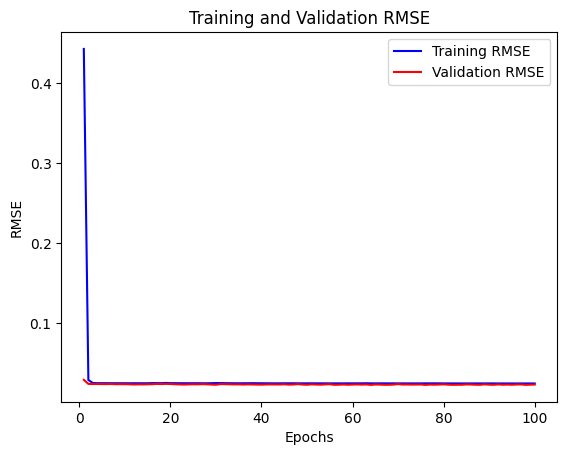

In [ ]:
import matplotlib.pyplot as plt

plt.plot(epochs, train_rmse, 'b', label='Training RMSE')
plt.plot(epochs, val_rmse, 'r', label='Validation RMSE')
plt.title('Training and Validation RMSE')
plt.xlabel('Epochs')
plt.ylabel('RMSE')
plt.legend()
plt.show()

<h2><b>R.B.13 Performance of the Model </b></h2>

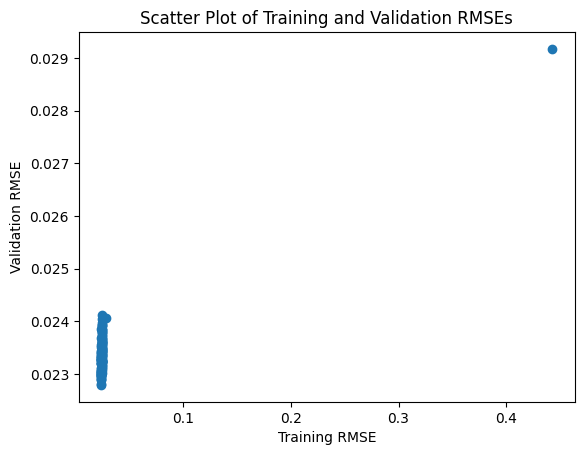

In [ ]:



# Load the training and validation RMSEs
training_rmse = train_rmse
validation_rmse = val_rmse

# Create the scatter plot
plt.scatter(training_rmse, validation_rmse)

# Add labels and title
plt.xlabel("Training RMSE")
plt.ylabel("Validation RMSE")
plt.title("Scatter Plot of Training and Validation RMSEs")

# Show the plot
plt.show()




230/230 [==============================] - 0s 1ms/step


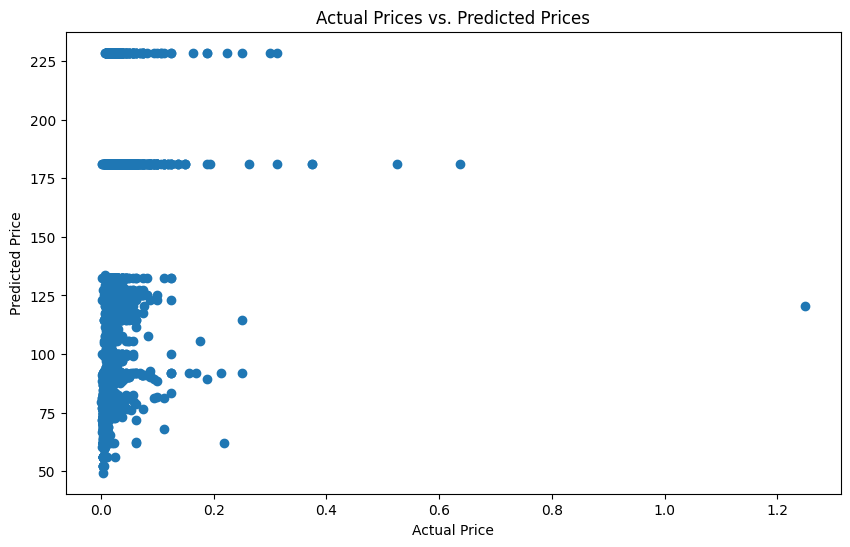

In [ ]:
import matplotlib.pyplot as plt

# Get model predictions on the test data
y_pred_scaled = model.predict(X_test)
y_pred = scaler.inverse_transform(y_pred_scaled)

# Create a scatter plot of actual prices vs. predicted prices
plt.figure(figsize=(10, 6))
plt.scatter(y_test_scaled, y_pred)
plt.title('Actual Prices vs. Predicted Prices')
plt.xlabel('Actual Price')
plt.ylabel('Predicted Price')
plt.show()


